In [10]:
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
#from pandas import datetime
from sklearn.preprocessing import MinMaxScaler
import math
#from math import sqrt
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#from keras.layers.core import  Dropout, Activation

In [11]:
def get_stock_data(normalized=0):
    url = "/content/drive/MyDrive/AAPL.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv(url, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [12]:
df = get_stock_data(0)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  import sys


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2021-04-05,123.870003,126.160004,123.070000,125.900002,0.012516,88651200,2021,04,05
1,2021-04-06,126.500000,127.129997,125.650002,126.209999,0.012546,80171300,2021,04,06
2,2021-04-07,125.830002,127.919998,125.139999,127.900002,0.012714,83466700,2021,04,07
3,2021-04-08,128.949997,130.389999,128.520004,130.360001,0.012959,88844600,2021,04,08
4,2021-04-09,129.800003,133.039993,129.470001,133.000000,0.013221,106686700,2021,04,09


# New section

In [13]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,123.870003,126.160004,125.900002,0.012516
1,126.500000,127.129997,126.209999,0.012546
2,125.830002,127.919998,127.900002,0.012714
3,128.949997,130.389999,130.360001,0.012959
4,129.800003,133.039993,133.000000,0.013221


In [14]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

       Open    High   Close    Volume
0    1.2387  1.2616  1.2590  1.251561
1    1.2650  1.2713  1.2621  1.254643
2    1.2583  1.2792  1.2790  1.271443
3    1.2895  1.3039  1.3036  1.295898
4    1.2980  1.3304  1.3300  1.322142
..      ...     ...     ...       ...
249  1.7669  1.7901  1.7896  1.789600
250  1.7855  1.7961  1.7777  1.777700
251  1.7784  1.7803  1.7461  1.746100
252  1.7403  1.7488  1.7431  1.743100
253  1.7403  1.7488  1.7431  1.743100

[254 rows x 4 columns]


In [15]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [16]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (203, 3)
y_train (203, 1)
X_test (51, 3)
y_test (51, 1)


In [17]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 100, validation_split=0.05)

Epoch 1/100
2/2 [==============================] - 1s 165ms/step - loss: 2.1381 - val_loss: 2.9392
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 2.1316 - val_loss: 2.9324
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 2.1258 - val_loss: 2.9255
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 2.1200 - val_loss: 2.9183
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 2.1138 - val_loss: 2.9108
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 2.1075 - val_loss: 2.9030
Epoch 7/100
2/2 [==============================] - 0s 26ms/step - loss: 2.1010 - val_loss: 2.8951
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 2.0943 - val_loss: 2.8869
Epoch 9/100
2/2 [==============================] - 0s 37ms/step - loss: 2.0875 - val_loss: 2.8786
Epoch 10/100
2/2 [==============================] - 0s 31ms/step - loss: 2.0806 - val_loss: 2.8700
Epoch 11/100
2/2 [

In [18]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[1.5831254]
 [1.5616841]
 [1.555984 ]
 [1.5699239]
 [1.5651035]
 [1.6145532]
 [1.6463515]
 [1.6543467]
 [1.6614395]
 [1.654621 ]]


In [19]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.05 RMSE)
Test Score: 0.00 MSE (0.07 RMSE)


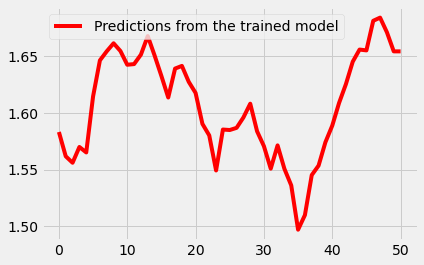

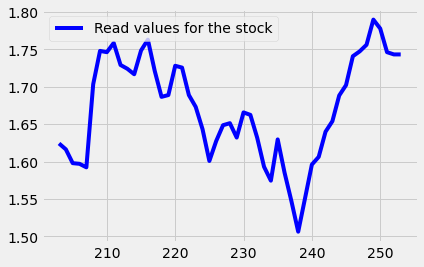

In [20]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()